# **Bridth First Search**

In [39]:
graph = {
    'S' : ['A','B','D'],
    'A' : ['C'],
    'B' : ['D'],
    'D' : ['G'],
    'C' : ['D', 'G'],
    'G' : []
}

def bfs(graph, start, goal):
    visited = []
    queue = [[start]]
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            return path
        else:
          adjacent_node = graph.get(node, [])
          for new_node in adjacent_node:
              new_path = path.copy()
              new_path.append(new_node)
              queue.append(new_path)

search = bfs(graph, 'S', 'G')
print(search)


['S', 'D', 'G']


# **Depth First Search**

In [ ]:
graph = {
    'S' : ['A','B','D'],
    'A' : ['C'],
    'B' : ['D'],
    'D' : ['G'],
    'C' : ['D', 'G'],
    'G' : []
}

def dfs(graph, start, goal):
    visited = []
    stack = [[start]]
    while stack:
        path = stack.pop()
        node = path[-1]
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            return path
        else:
            adjacent_node = graph.get(node, [])
            for new_node in adjacent_node:
                new_path = path.copy()
                new_path.append(new_node)
                stack.append(new_path)

search = dfs(graph, 'S', 'G')
print(search)

['S', 'D', 'G']


# **Uniform Cost Search**

In [ ]:
from functools import total_ordering
graph = {
    'S' : [('A',2),('B',3),('D',5)],
    'A' : [('C',4)],
    'B' : [('D',4)],
    'C' : [('D',1), ('G',2)],
    'D' : [('G',5)],
    'G' : []
}

def cost_path(path):
  total_cost = 0
  for (node,cost) in path:
    total_cost += cost
  return total_cost, path[-1][0]

def ucs(graph, start, goal):
  visited = []
  queue = [[(start, 0)]]
  while queue:
    # priority queue
    queue.sort(key = cost_path)
    path = queue.pop(0)
    node = path[-1][0]
    if node in visited:
      continue
    visited.append(node)
    if node == goal:
      return path
    else:
      adjacent_node = graph.get(node, [])
      for new_node in adjacent_node:
        new_path = path.copy()
        new_path.append(new_node)
        queue.append(new_path)

search = ucs(graph, 'S', 'G')
print(search)
print(cost_path(search))

[('S', 0), ('A', 2), ('C', 4), ('G', 2)]
(8, 'G')


# **Dipth Limited Search**

In [ ]:
graph = {
    'S' : ['A','B','D'],
    'A' : ['C'],
    'B' : ['D'],
    'D' : ['G'],
    'C' : ['D', 'G'],
    'G' : []
}

def dls(graph, start, goal, limited):
  visited = []
  stack = [[start]]
  while stack:
    path = stack.pop()
    node = path[-1]
    if node in visited:
      continue
    visited.append(node)
    if len(path) > limited:
      continue
    if node == goal:
      return path
    else:
      adjacent_node = graph.get(node, [])
      for new_node in adjacent_node:
        new_path = path.copy()
        new_path.append(new_node)
        stack.append(new_path)

search = dls(graph, "S", "G", 3)
print(search)

['S', 'D', 'G']


# **Iterative Deepening search**

In [ ]:
graph = {
    'S' : ['A','B','D'],
    'A' : ['C'],
    'B' : ['D'],
    'D' : ['G'],
    'C' : ['D', 'G'],
    'G' : []
}

def ids(graph, start, goal):
  limited = 1
  while True:
    search = dls(graph, start, goal, limited)
    if search != None:
      return search
    limited +=1

search = ids(graph, 'S', 'G')
print(search)

# **Greedy Best First Search**

In [45]:
graph = {
    'S' : ['A','B'],
    'A' : ['B','C','G'],
    'B' : ['C'],
    'C' : ['G'],
    'G' : []
}

h_fun = {
    'S' : 7,
    'A' : 6,
    'B' : 4,
    'C' : 2,
    'G' : 0,
}

def cost_path(path):
  return h_fun[path[-1]], path[-1]

def gbfs(graph, start, goal):
  visited = []
  queue = [[start]]
  while queue:
    queue.sort(key = cost_path)
    path = queue.pop(0)
    node = path[-1]
    if node in visited:
      continue
    visited.append(node)
    if node == goal:
      return path
    else:
      adjacent_node = graph.get(node, [])
      for new_node in adjacent_node:
        new_path = path.copy()
        new_path.append(new_node)
        queue.append(new_path)

search = gbfs(graph, 'S', 'G')
print(search)
print(cost_path(search))

['S', 'B', 'C', 'G']
(0, 'G')


# A* Search

In [47]:
graph = {
    'S' : [('A',1),('B',4)],
    'A' : [('B',2),('C',5),('G',12)],
    'B' : [('C',2)],
    'C' : [('G',3)],
    'G' : []

}

h_fun = {
    'S' : 7,
    'A' : 6,
    'B' : 4,
    'C' : 2,
    'G' : 0,
}

def cost_path(path):
  total_cost = 0
  f_fun = 0
  for (node, cost) in path:
    total_cost += cost
  f_fun = total_cost + h_fun[path[-1][0]]
  return f_fun, path[-1][0]

def a_star_search(graph, start, goal):
  visited = []
  queue = [[(start, 0)]]
  while queue:
    queue.sort(key = cost_path)
    path = queue.pop(0)
    node = path[-1][0]
    if node in visited:
      continue
    visited.append(node)
    if node == goal:
      return path
    else:
      adjacent_node = graph.get(node,[])
      for new_node in adjacent_node:
        new_path = path.copy()
        new_path.append(new_node)
        queue.append(new_path)

search = a_star_search(graph, 'S', 'G')
print(search)
print(cost_path(search))

[('S', 0), ('A', 1), ('B', 2), ('C', 2), ('G', 3)]
(8, 'G')


# **Method 1 for drawing the graph**

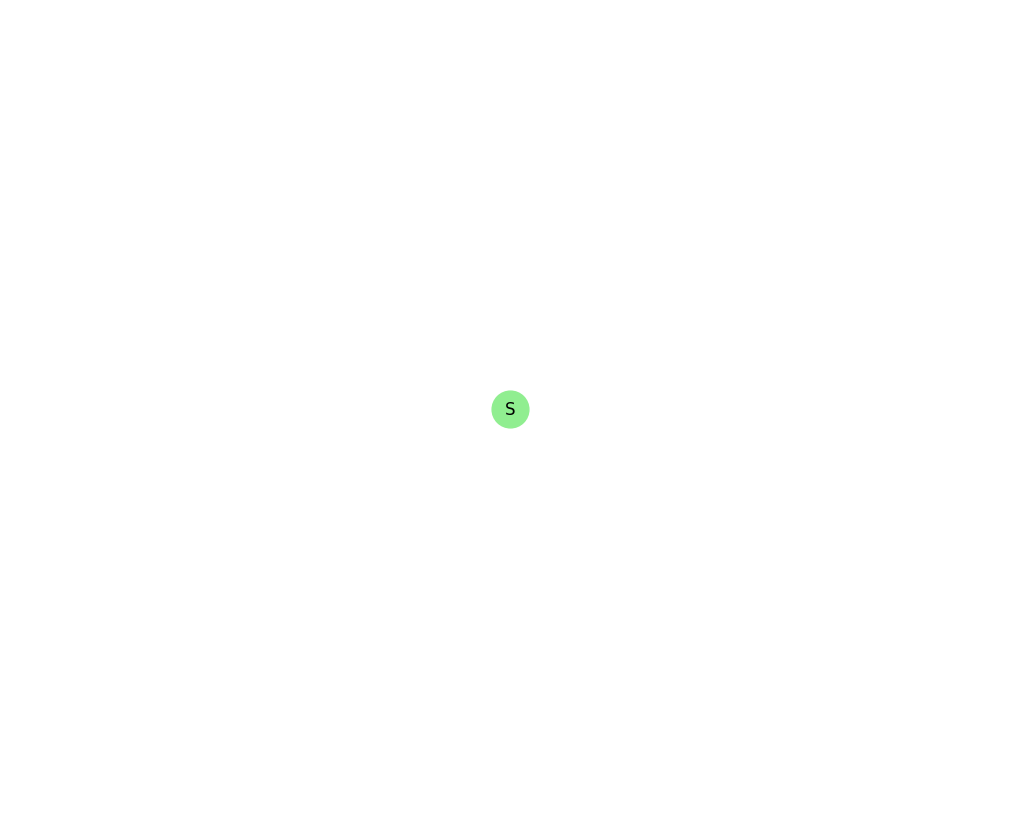

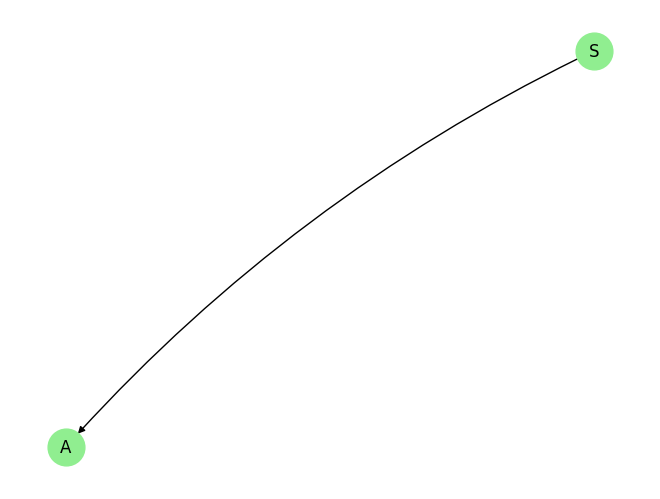

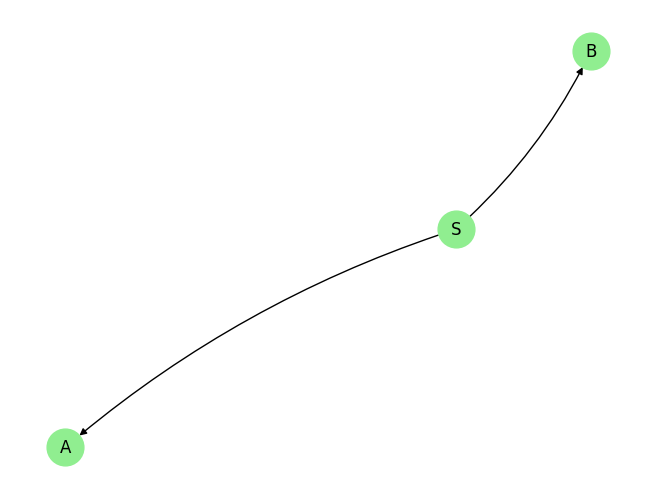

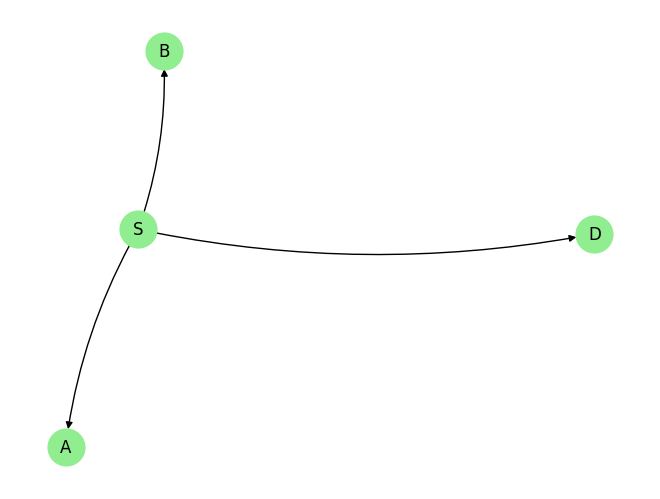

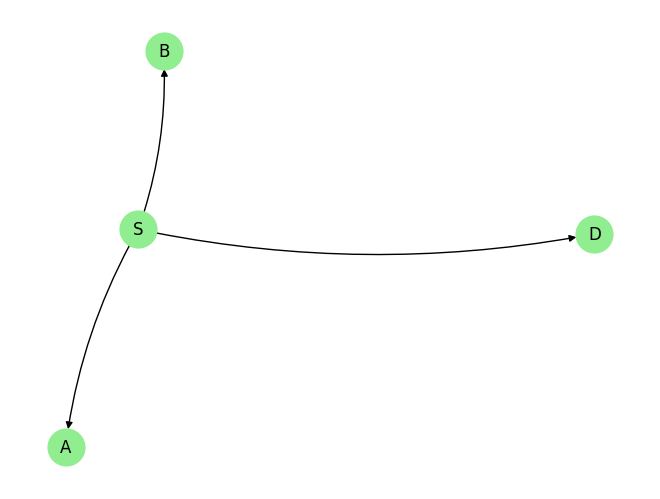

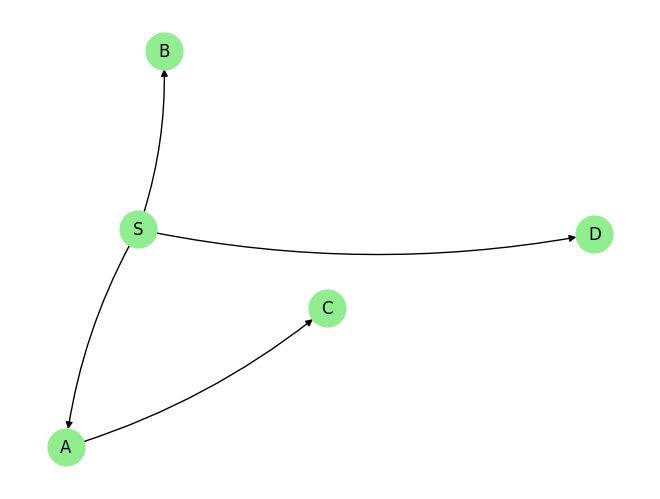

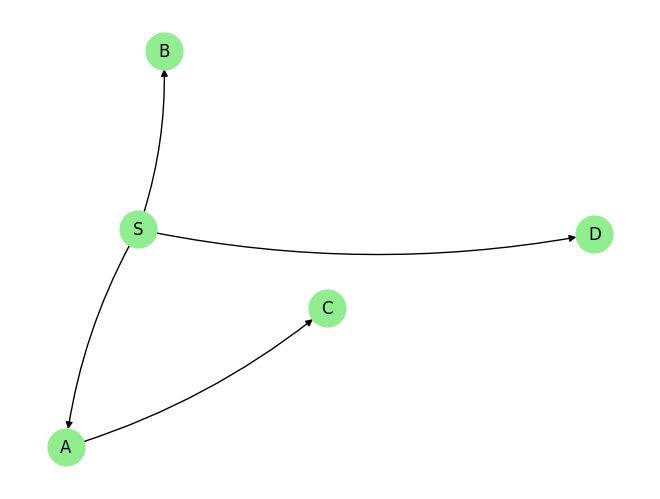

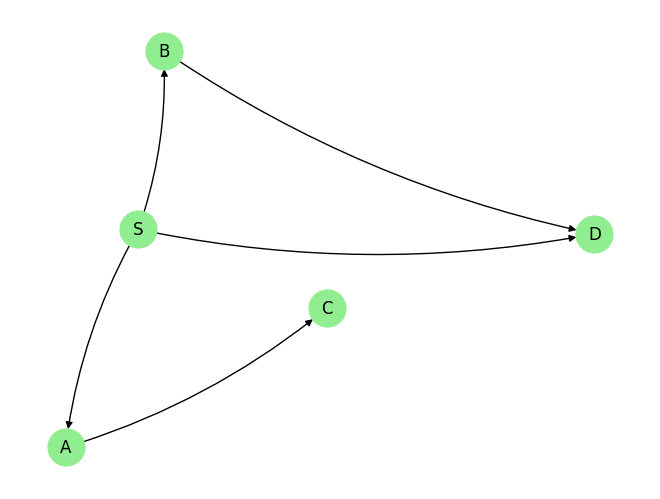

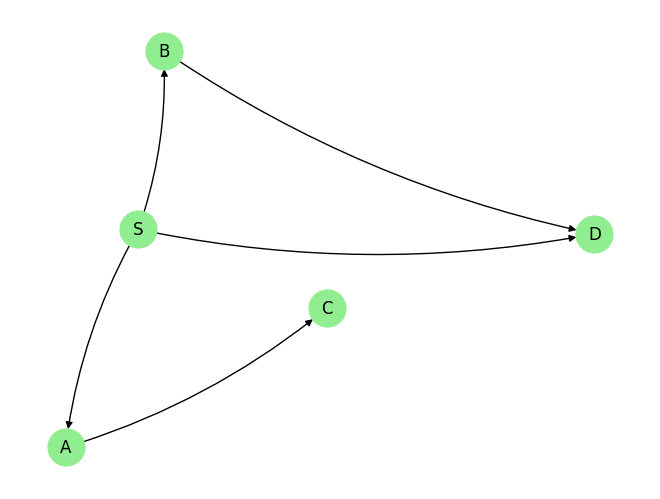

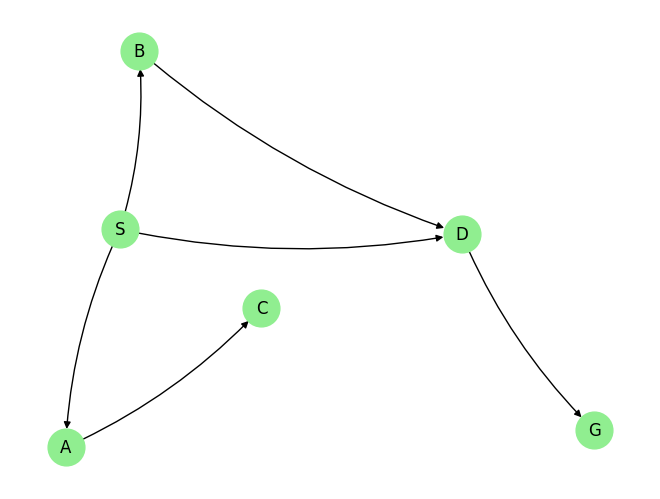

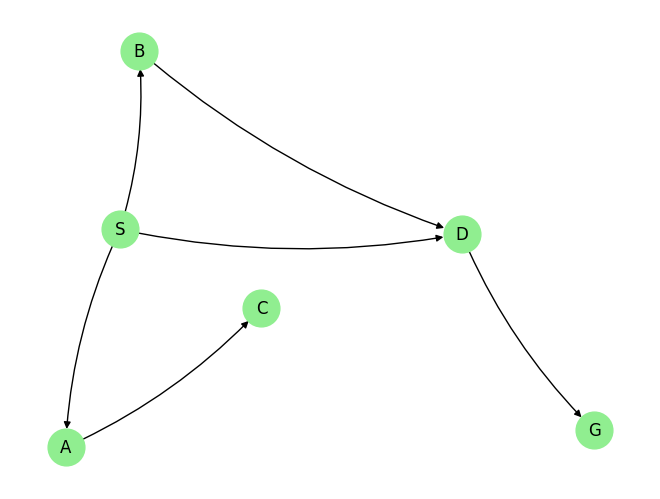

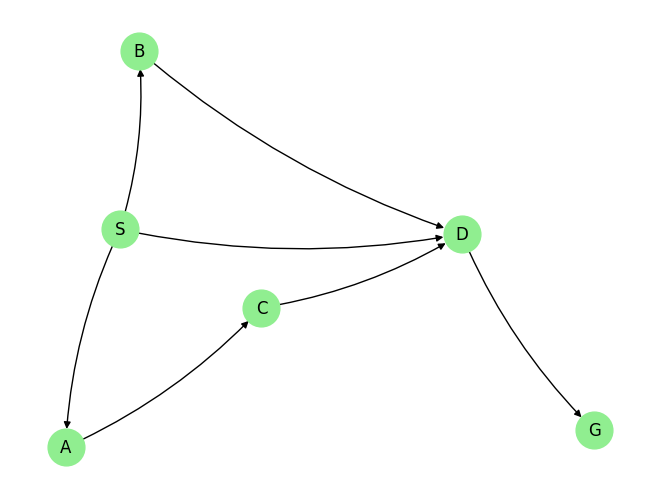

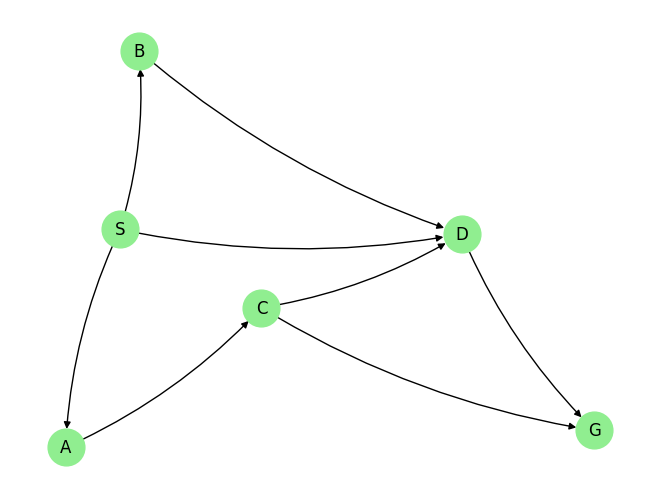

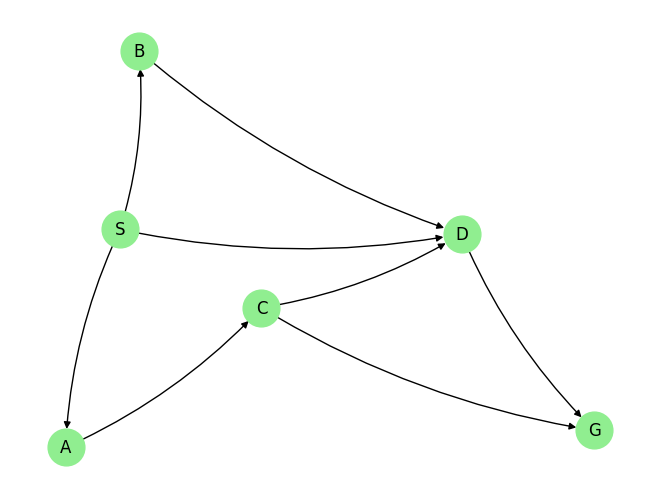

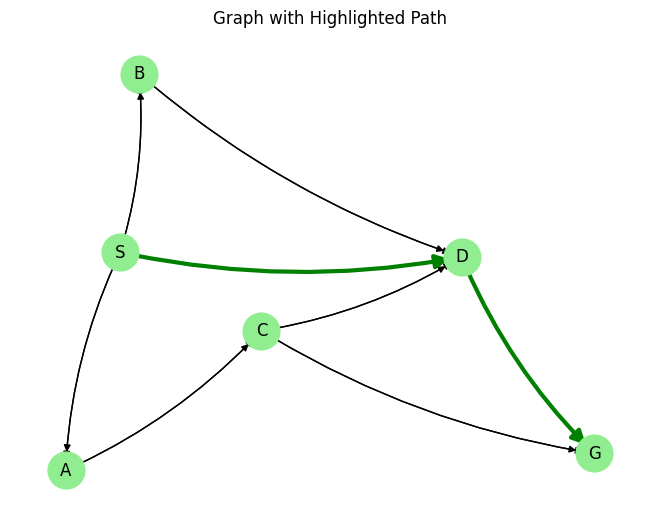

In [75]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph_method1(graph, search):
    """this function for drow a graph for bfs, dfs, dls, ids, gbfs"""

    def get_edges(path):
        edges = []
        for i in range(len(path) - 1):
            edges.append((path[i], path[i + 1]))
        return edges

    # الحصول على المسار باستخدام BFS
    path_edges = get_edges(search)

    # إنشاء الرسم البياني
    final_graph = nx.DiGraph()
    pos = nx.spring_layout(nx.DiGraph(graph))  # تثبيت التخطيط

    plt.figure(figsize=(10, 8))

    # إضافة العقد والحواف تدريجيًا
    for node, neighbors in graph.items():
        final_graph.add_node(node)
        nx.draw(final_graph, pos, with_labels=True, node_color="lightgreen", node_size=700,connectionstyle="arc3,rad=0.1")
        plt.pause(1)  # انتظار لرؤية العقد

        for neighbor in neighbors:
            final_graph.add_edge(node, neighbor)
            nx.draw(final_graph, pos, with_labels=True, node_color="lightgreen", node_size=700,connectionstyle="arc3,rad=0.1")
            plt.pause(1)  # انتظار لرؤية الحواف

    # تمييز المسار باستخدام الألوان والسماكات
    edges_color = ['green' if e in path_edges else 'black' for e in final_graph.edges()]
    edges_width = [3 if e in path_edges else 1 for e in final_graph.edges()]
    edges_arrow = [20 if e in path_edges else 10 for e in final_graph.edges()]

    # رسم الحواف المميزة
    nx.draw(final_graph, pos, with_labels=True, node_color="lightgreen", node_size=700,connectionstyle="arc3,rad=0.1")
    nx.draw_networkx_edges(final_graph, pos, edge_color=edges_color, width=edges_width, arrowsize = edges_arrow,connectionstyle="arc3,rad=0.1")

    plt.title("Graph with Highlighted Path")
    plt.show()

graph = {
    'S' : ['A','B','D'],
    'A' : ['C'],
    'B' : ['D'],
    'D' : ['G'],
    'C' : ['D', 'G'],
    'G' : []

}

search = bfs(graph, 'S', 'G')

draw_graph_method1(graph, search)


# **Method 2 for drawing the graph**

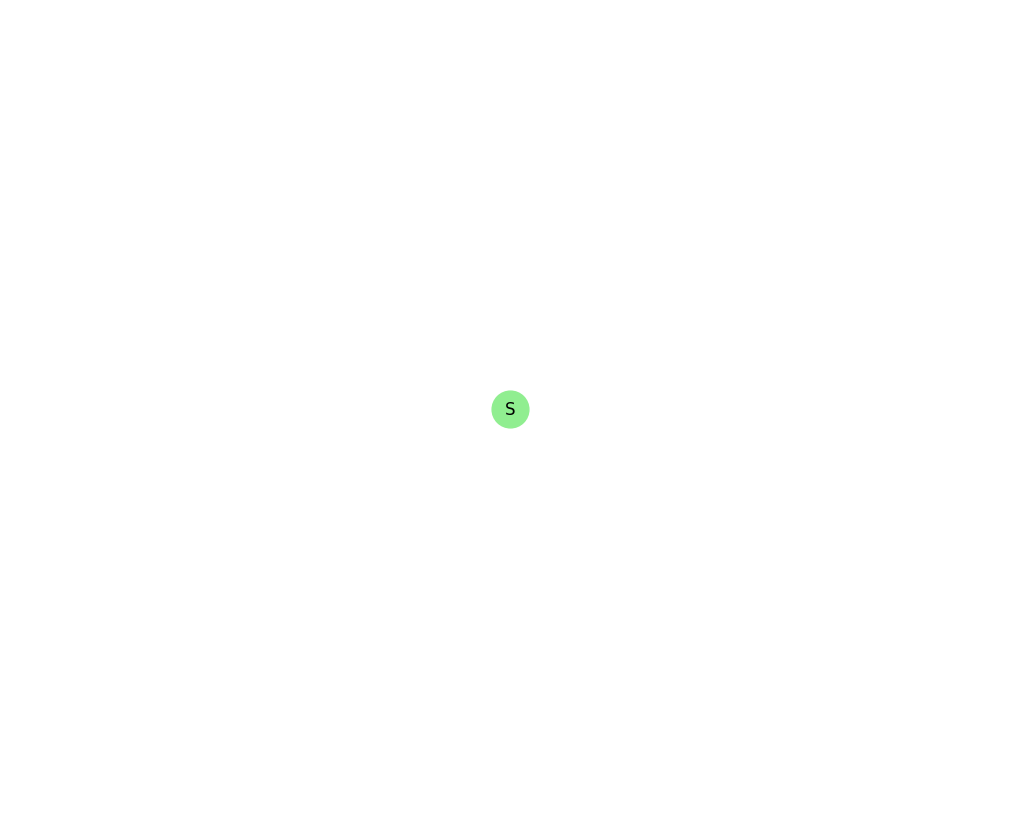

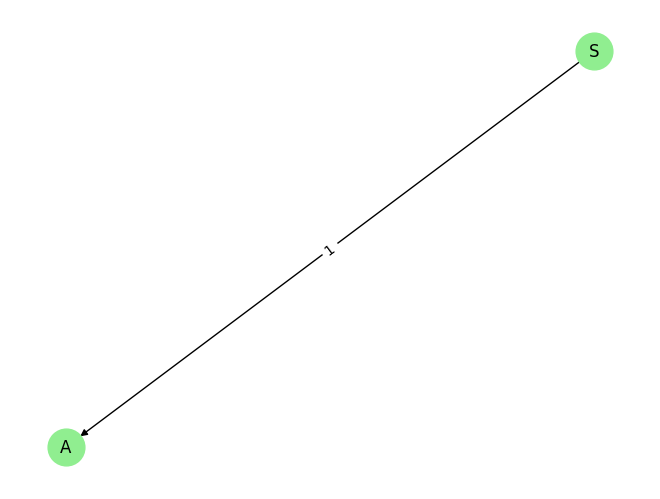

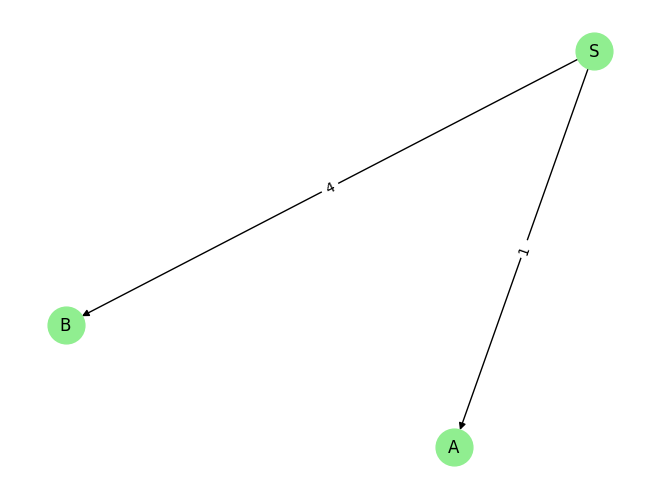

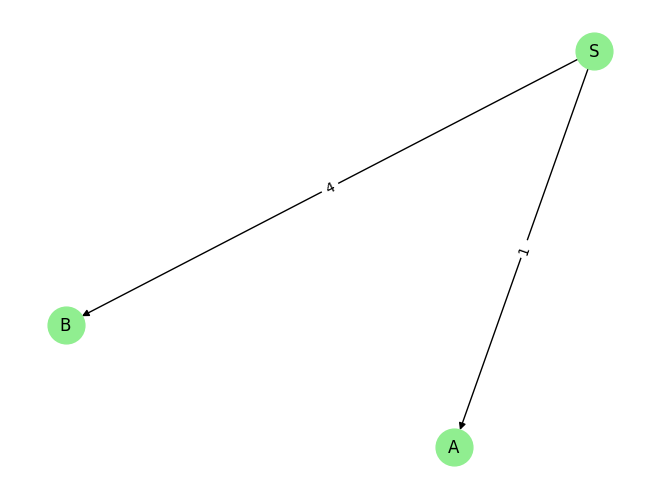

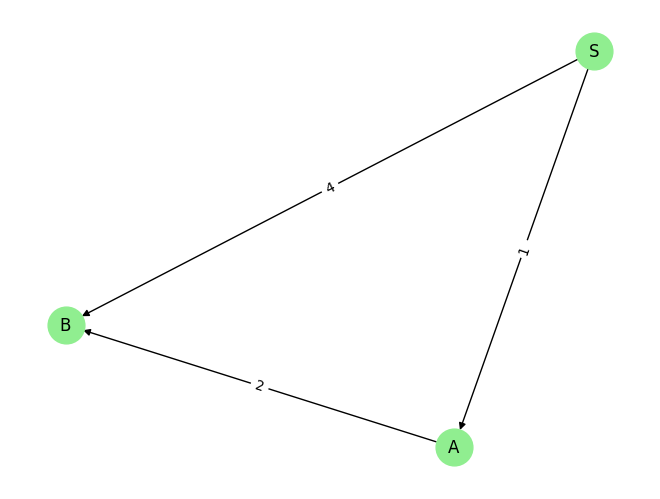

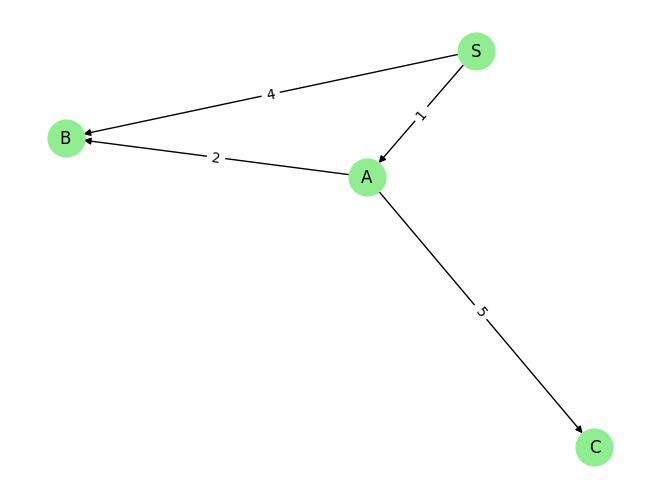

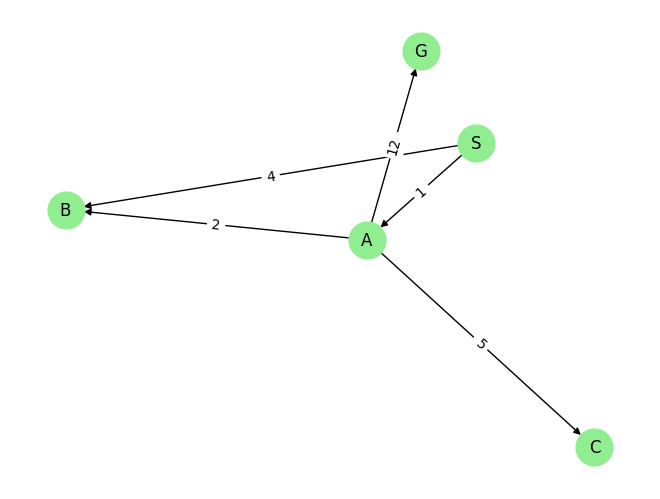

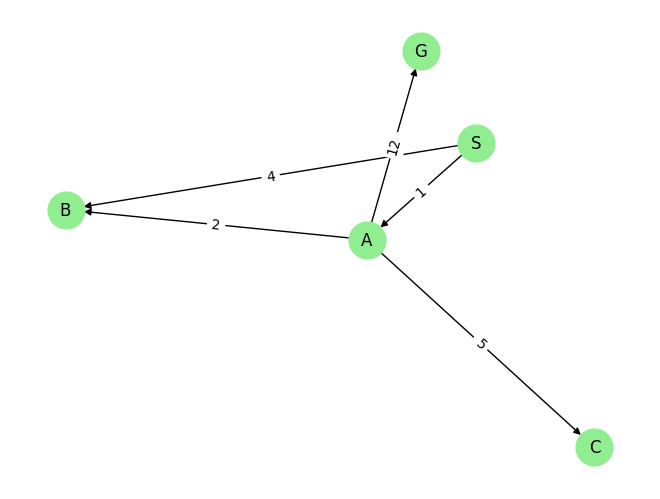

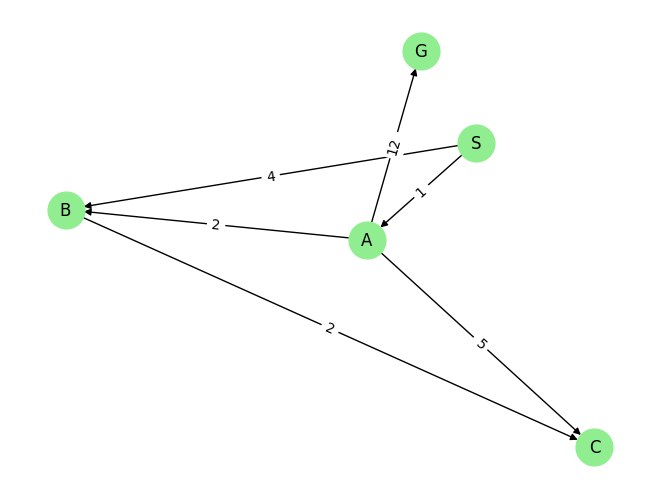

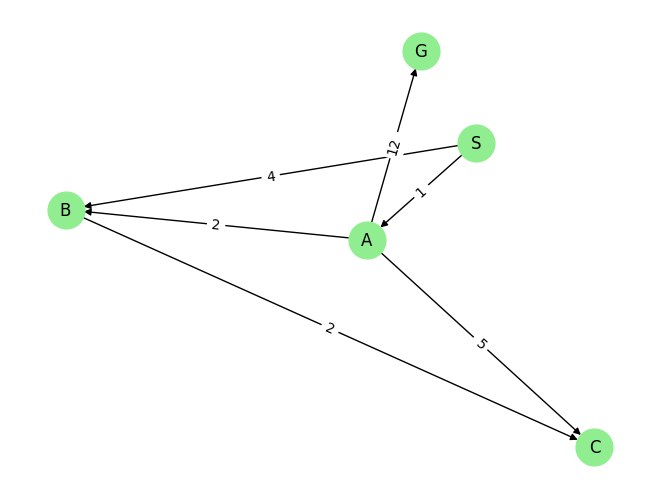

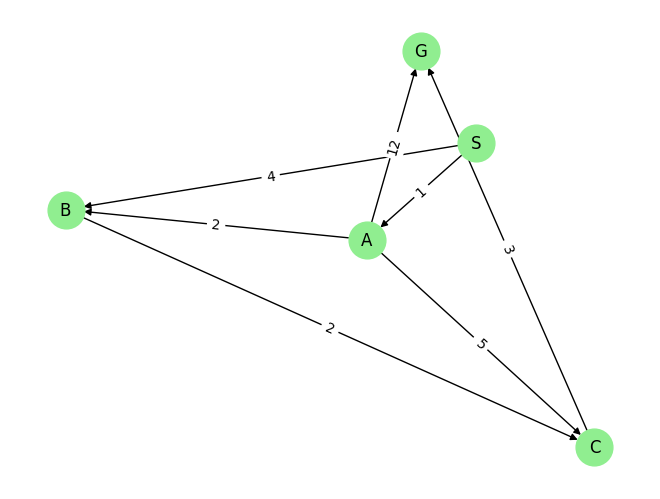

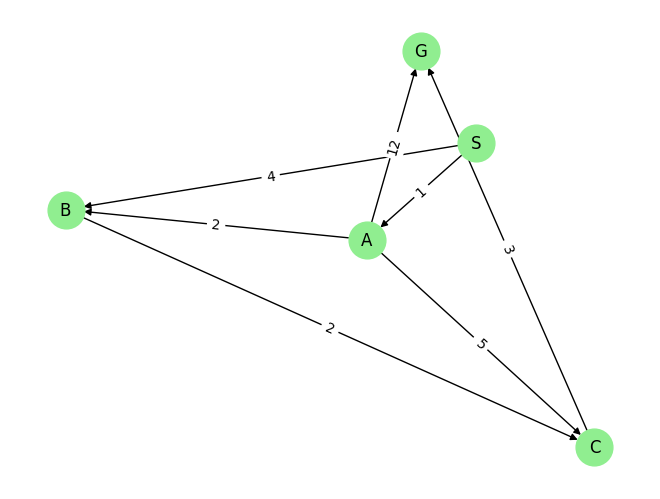

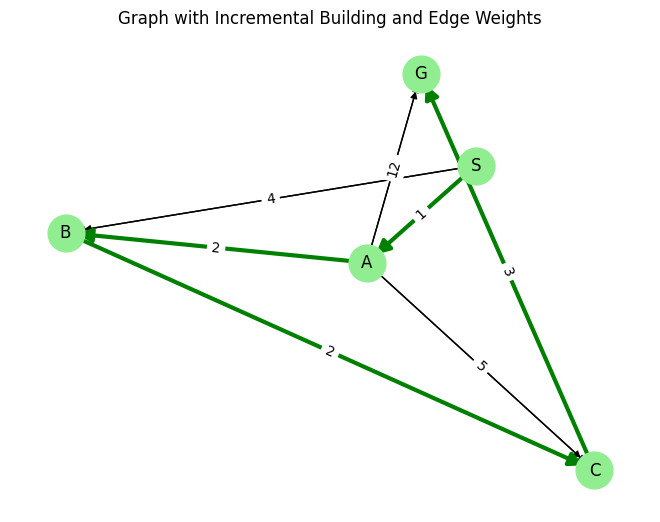

In [74]:
import matplotlib.pyplot as plt
import networkx as nx


def draw_graph_method2(graph, search):
    """ this function for drow a graph for ucs, A* """


    def get_edges(path):
        tuple_edges = []
        for i in range(len(path)-1):
            tuple_edges.append((path[i][0], path[i+1][0]))
        return tuple_edges

    # الحصول على المسار باستخدام A*
    path_edges = get_edges(search)

    # إنشاء الرسم البياني
    final_graph = nx.DiGraph()
    pos = nx.spring_layout(nx.DiGraph(graph))  # إعادة حساب المواضع

    plt.figure(figsize=(10, 8))

    # بناء الرسم البياني تدريجيًا
    for node, neighbors in graph.items():
        # إضافة العقد
        final_graph.add_node(node)
        nx.draw(final_graph, pos, with_labels=True, node_color="lightgreen", node_size=700)
        # رسم الأوزان على الحواف
        edge_labels = nx.get_edge_attributes(final_graph, "weight")
        nx.draw_networkx_edge_labels(final_graph, pos, edge_labels=edge_labels)
        plt.pause(1)  # انتظار لرؤية العقد

        # إضافة الحواف مع الأوزان
        for neighbor, value in neighbors:
            final_graph.add_edge(node, neighbor, weight=value)
            nx.draw(final_graph, pos, with_labels=True, node_color="lightgreen", node_size=700)
            # رسم الأوزان على الحواف
            edge_labels = nx.get_edge_attributes(final_graph, "weight")
            nx.draw_networkx_edge_labels(final_graph, pos, edge_labels=edge_labels)
            plt.pause(1)  # انتظار لرؤية الحواف

    edges_color = ["green" if e in path_edges else "black" for e in final_graph.edges()]
    edges_width = [3 if e in path_edges else 1 for e in final_graph.edges()]
    edges_arrow = [20 if e in path_edges else 10 for e in final_graph.edges()]

    nx.draw(final_graph, pos, with_labels=True, node_color="lightgreen", node_size=700)
    nx.draw_networkx_edges(final_graph, pos, edge_color = edges_color, arrowsize = edges_arrow, width = edges_width)
    nx.draw_networkx_edge_labels(final_graph, pos, edge_labels=edge_labels)

    plt.title("Graph with Incremental Building and Edge Weights")
    plt.show()

graph = {
    'S' : [('A',1),('B',4)],
    'A' : [('B',2),('C',5),('G',12)],
    'B' : [('C',2)],
    'C' : [('G',3)],
    'G' : []
}


search = a_star_search(graph, 'S', 'G')
draw_graph_method2(graph, search)
